In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras import models, layers
import keras
import matplotlib.pyplot as plt


#Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalize value to [0, 1]
x_train /= 255
x_test /= 255

#Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

#Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

print('trainImages size:' + str(x_train.shape))
print('trainLabels size:' + str(y_train.shape))
print('testImages size:' + str(x_test.shape))
print('testLabels size:' + str(y_test.shape))


Using TensorFlow backend.


trainImages size:(60000, 28, 28, 1)
trainLabels size:(60000, 10)
testImages size:(10000, 28, 28, 1)
testLabels size:(10000, 10)


In [2]:
#Instantiate an empty model
model = Sequential()

#C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), 
                        activation='tanh', input_shape=(28,28,1), padding="same"))

#S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

#C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))

#S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

#FC5 Fully Connected Layer
model.add(layers.Dense(120, activation='tanh'))

#FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model.fit(x=x_train,y=y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=1)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.8020 - acc: 0.7967 - val_loss: 0.3878 - val_acc: 0.8955
Epoch 2/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.3417 - acc: 0.9038 - val_loss: 0.2840 - val_acc: 0.9188
Epoch 3/20
60000/60000 [==============================] - 24s 393us/step - loss: 0.2730 - acc: 0.9206 - val_loss: 0.2372 - val_acc: 0.9303
Epoch 4/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.2314 - acc: 0.9324 - val_loss: 0.2036 - val_acc: 0.9403
Epoch 5/20
60000/60000 [==============================] - 20s 335us/step - loss: 0.2004 - acc: 0.9415 - val_loss: 0.1758 - val_acc: 0.9476
Epoch 6/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.1763 - acc: 0.9487 - val_loss: 0.1552 - val_acc: 0.9560
Epoch 7/20
6000

In [3]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 2s 166us/step
Test loss 0.0624, accuracy 98.09%


Text(0, 0.5, 'acc')

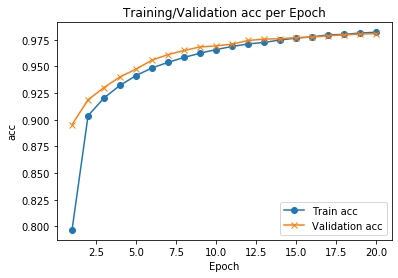

In [5]:
f,ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

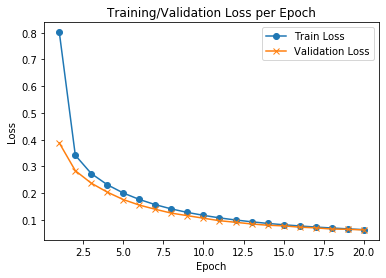

In [11]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')